## Binary Image Classification Models

**Project Task:**

**Wildlife Image Classification between two classes: Bobcats and Panthers** 


Image dataset comes from UCF's Florida Wildlife Camera Trap Dataset:
https://www.crcv.ucf.edu/research/projects/florida-wildlife-camera-trap-dataset/




### Imports and Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import os
from google.colab import drive
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.callbacks import Callback, CSVLogger

In [ ]:
drive.mount('/content/drive')
np.random.seed(48)

Mounted at /content/drive


In [ ]:
train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train = train_gen.flow_from_directory(
    '/content/drive/MyDrive/Wildlife Capstone/wildlife_data/train',
    target_size=(256,256),
    class_mode = 'binary'
    )
test = test_gen.flow_from_directory(
    '/content/drive/MyDrive/Wildlife Capstone/wildlife_data/test',
    target_size=(256,256),
    class_mode = 'binary'
    )
val_set = test_gen.flow_from_directory(
    '/content/drive/MyDrive/Wildlife Capstone/wildlife_data/validation',
    target_size=(256,256),
    class_mode = 'binary'
    )

Found 3542 images belonging to 2 classes.
Found 754 images belonging to 2 classes.
Found 503 images belonging to 2 classes.


In [ ]:
train.class_indices, test.class_indices

({'Bobcats': 0, 'Panthers': 1}, {'Bobcats': 0, 'Panthers': 1})

### Model Training

#### Base Model

In [ ]:
basemodel = Sequential()
basemodel.add(Conv2D(64, (3,3), activation='relu', input_shape=(256,256,3)))
basemodel.add(MaxPooling2D(pool_size=(2,2)))
basemodel.add(Conv2D(64, (3,3), activation='relu'))
basemodel.add(MaxPooling2D(pool_size=(2,2)))
basemodel.add(Flatten())
basemodel.add(Dense(28, activation='relu'))
basemodel.add(Dense(1, activation='sigmoid'))

In [ ]:
# https://keras.io/api/callbacks/
# https://keras.io/api/callbacks/model_checkpoint/

base_dir = '/content/drive/MyDrive/Wildlife Capstone/Model_Files/basemodel'
b_path = '/base_1.ckpt'

base_callbacks = [
                  tf.keras.callbacks.ModelCheckpoint(
                      filepath = base_dir + b_path,
                      save_weights_only=True,
                      monitor = 'val_precision',
                      save_best_only=True
                  ),
                  tf.keras.callbacks.CSVLogger(
                      base_dir + '/basemodel.log', 
                      separator=',', 
                      append=True
                      )
]



In [ ]:
basemodel.compile(
    optimizer='adam',
    loss='bce',
    metrics=['accuracy', 'Recall', 'Precision'])

In [ ]:
history = basemodel.fit(train, 
                        validation_data = test, 
                        validation_batch_size=32, 
                        batch_size=32,
                        epochs=5,
                        callbacks = base_callbacks, 
                        verbose=1
                        )

Epoch 1/5
111/111 [==============================] - 761s 7s/step - loss: 0.6558 - accuracy: 0.6400 - recall: 0.7336 - precision: 0.6481 - val_loss: 0.5930 - val_accuracy: 0.5849 - val_recall: 0.8958 - val_precision: 0.5575
Epoch 2/5
111/111 [==============================] - 760s 7s/step - loss: 0.4400 - accuracy: 0.7905 - recall: 0.8092 - precision: 0.8050 - val_loss: 0.5932 - val_accuracy: 0.6260 - val_recall: 0.8932 - val_precision: 0.5873
Epoch 3/5
111/111 [==============================] - 755s 7s/step - loss: 0.2988 - accuracy: 0.8611 - recall: 0.8697 - precision: 0.8733 - val_loss: 0.7426 - val_accuracy: 0.6207 - val_recall: 0.8750 - val_precision: 0.5854
Epoch 4/5
111/111 [==============================] - 762s 7s/step - loss: 0.1718 - accuracy: 0.9274 - recall: 0.9312 - precision: 0.9346 - val_loss: 1.0745 - val_accuracy: 0.6897 - val_recall: 0.7552 - val_precision: 0.6744
Epoch 5/5
111/111 [==============================] - 757s 7s/step - loss: 0.1151 - accuracy: 0.9565 - re

In [ ]:
basemodel.save_weights(base_dir + '/base_saved_weights')
basemodel.save(base_dir + '/base_saved_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Wildlife Capstone/Model_Files/basemodel/base_saved_model/assets


In [ ]:
history.history

{'accuracy': [0.6400339007377625,
  0.790513813495636,
  0.8610954284667969,
  0.9274421334266663,
  0.95652174949646],
 'loss': [0.6557897329330444,
  0.4399547576904297,
  0.2988317906856537,
  0.17184390127658844,
  0.11512702703475952],
 'precision': [0.6480884552001953,
  0.8049792647361755,
  0.8732984066009521,
  0.9345892071723938,
  0.9627492427825928],
 'recall': [0.7335766553878784,
  0.8091762065887451,
  0.8696559071540833,
  0.9311783313751221,
  0.9567257761955261],
 'val_accuracy': [0.5848806500434875,
  0.6259946823120117,
  0.6206896305084229,
  0.6896551847457886,
  0.633952260017395],
 'val_loss': [0.5929645299911499,
  0.5932033061981201,
  0.7425875663757324,
  1.0745060443878174,
  1.0686962604522705],
 'val_precision': [0.5575364828109741,
  0.5873287916183472,
  0.5853658318519592,
  0.6744186282157898,
  0.6093117594718933],
 'val_recall': [0.8958333134651184,
  0.8932291865348816,
  0.875,
  0.7552083134651184,
  0.7838541865348816]}

In [ ]:
basemodel.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 127, 127, 64)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 246016)            0         
                                                                 
 dense_10 (Dense)            (None, 28)               

#### Model 1 

In [ ]:
model1 = Sequential()
model1.add(Conv2D(16, (3,3), activation='relu', input_shape=(256,256,3)))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(32, (3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(64, (3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(48, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [ ]:
model1.compile(
    optimizer='adam',
    loss='bce',
    metrics=['accuracy', 'Recall','Precision'])


In [ ]:
model1_dir = '/content/drive/MyDrive/Wildlife Capstone/Model_Files/model_1'
m1_path = '/m1.ckpt'

model1_callbacks = [
                  tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                           min_delta = 0, 
                           patience = 10, 
                           verbose = 1
                  ),
                  tf.keras.callbacks.ModelCheckpoint(
                      filepath = model1_dir + m1_path,
                      save_weights_only = True,
                      monitor = 'val_precision',
                      save_best_only = True
                  ),
                  tf.keras.callbacks.CSVLogger(
                      model1_dir + '/model1.log', 
                      separator=',', 
                      append=True
                      )
]

In [ ]:
history_1 = model1.fit(train, 
                     validation_data = test, 
                     validation_batch_size=32,
                     batch_size=32,
                     epochs=50,
                     callbacks=[model1_callbacks], 
                     verbose=1)

Epoch 1/50
111/111 [==============================] - 416s 4s/step - loss: 0.6776 - accuracy: 0.6095 - recall: 0.7539 - precision: 0.6135 - val_loss: 0.6342 - val_accuracy: 0.6114 - val_recall: 0.9089 - val_precision: 0.5750
Epoch 2/50
111/111 [==============================] - 435s 4s/step - loss: 0.4798 - accuracy: 0.7688 - recall: 0.8107 - precision: 0.7732 - val_loss: 0.6503 - val_accuracy: 0.6592 - val_recall: 0.7995 - val_precision: 0.6304
Epoch 3/50
111/111 [==============================] - 454s 4s/step - loss: 0.3379 - accuracy: 0.8498 - recall: 0.8712 - precision: 0.8543 - val_loss: 0.8113 - val_accuracy: 0.7308 - val_recall: 0.7240 - val_precision: 0.7413
Epoch 4/50
111/111 [==============================] - 431s 4s/step - loss: 0.2183 - accuracy: 0.9088 - recall: 0.9135 - precision: 0.9178 - val_loss: 0.8832 - val_accuracy: 0.6804 - val_recall: 0.8646 - val_precision: 0.6372
Epoch 5/50
111/111 [==============================] - 436s 4s/step - loss: 0.1495 - accuracy: 0.9362

In [ ]:
model1.save_weights(model1_dir + '/model1_saved_weights')
model1.save(model1_dir + '/model1_saved_model')

In [ ]:
history_1.history

{'accuracy': [0.6095426082611084,
  0.768774688243866,
  0.8498023748397827,
  0.9088085889816284,
  0.9361942410469055,
  0.9641445279121399,
  0.9760022759437561,
  0.9810841083526611,
  0.9856013655662537,
  0.9949181079864502,
  0.9974590539932251],
 'loss': [0.6776330471038818,
  0.4797826111316681,
  0.3378831148147583,
  0.21832050383090973,
  0.1495419442653656,
  0.09565973281860352,
  0.06463294476270676,
  0.06319228559732437,
  0.04188521206378937,
  0.02833487093448639,
  0.018020465970039368],
 'precision': [0.6134917140007019,
  0.7732471227645874,
  0.85429447889328,
  0.9177579879760742,
  0.9433962106704712,
  0.9710678458213806,
  0.9846642017364502,
  0.9832898378372192,
  0.988487720489502,
  0.9947916865348816,
  0.9989545345306396],
 'recall': [0.7539103031158447,
  0.8107403516769409,
  0.8712199926376343,
  0.9134514927864075,
  0.9384775757789612,
  0.9624608755111694,
  0.970802903175354,
  0.9817517995834351,
  0.9848800897598267,
  0.9958289861679077,
  0.9

In [ ]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 64)      

#### Model 2


In [ ]:
model2 = Sequential()
model2.add(Conv2D(16, (3,3), activation='relu', input_shape=(256,256,3)))
model2.add(Conv2D(16, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(32, (3,3), activation='relu'))
model2.add(Conv2D(32, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(128, (3,3), activation='relu'))
model2.add(Conv2D(128, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Flatten())
model2.add(Dense(45, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
model2.compile(
    optimizer= Adam(learning_rate=0.0001),
    loss='bce',
    metrics=['accuracy', 'Recall', 'Precision'])

In [ ]:
model2_dir = '/content/drive/MyDrive/Wildlife Capstone/Model_Files/model_2'
m2_path = '/model2_1.ckpt'


model2_callbacks = [
                  tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                           min_delta = 0, 
                           patience = 10, 
                           verbose = 1
                           ),
                  tf.keras.callbacks.ModelCheckpoint(
                      filepath = model2_dir + m2_path,
                      save_weights_only=True,
                      monitor = 'val_precision',
                      save_best_only=True
                  ),
                  tf.keras.callbacks.CSVLogger(
                      model2_dir + '/model2.log', 
                      separator=',', 
                      append=True
                      )
]

In [ ]:
history_2 = model2.fit(train, 
                        validation_data = test, 
                        validation_batch_size=32, 
                        batch_size=32,
                        epochs=50, 
                        callbacks = [model2_callbacks],
                        verbose=1
                        )

Epoch 1/50
111/111 [==============================] - 825s 7s/step - loss: 0.6865 - accuracy: 0.5452 - recall: 0.9385 - precision: 0.5466 - val_loss: 0.6854 - val_accuracy: 0.6127 - val_recall: 0.4583 - val_precision: 0.6769
Epoch 2/50
111/111 [==============================] - 804s 7s/step - loss: 0.6300 - accuracy: 0.6437 - recall: 0.7424 - precision: 0.6496 - val_loss: 0.6914 - val_accuracy: 0.5531 - val_recall: 0.9036 - val_precision: 0.5363
Epoch 3/50
111/111 [==============================] - 809s 7s/step - loss: 0.5713 - accuracy: 0.7069 - recall: 0.7404 - precision: 0.7245 - val_loss: 0.6461 - val_accuracy: 0.6459 - val_recall: 0.7031 - val_precision: 0.6383
Epoch 4/50
111/111 [==============================] - 800s 7s/step - loss: 0.4954 - accuracy: 0.7716 - recall: 0.8029 - precision: 0.7813 - val_loss: 0.6477 - val_accuracy: 0.6592 - val_recall: 0.8177 - val_precision: 0.6267
Epoch 5/50
111/111 [==============================] - 799s 7s/step - loss: 0.4266 - accuracy: 0.7981

In [ ]:
history_2.history

{'accuracy': [0.5451722145080566,
  0.6437041163444519,
  0.7069452404975891,
  0.7715979814529419,
  0.7981366515159607,
  0.820440411567688,
  0.8481084108352661,
  0.8695651888847351,
  0.8983625173568726,
  0.9175606966018677,
  0.9257481694221497,
  0.9359118938446045,
  0.9409937858581543],
 'loss': [0.6864757537841797,
  0.6300496459007263,
  0.5713194012641907,
  0.4953998029232025,
  0.42655012011528015,
  0.37419435381889343,
  0.3276318311691284,
  0.2900077998638153,
  0.23709173500537872,
  0.19856539368629456,
  0.18167918920516968,
  0.1541939675807953,
  0.13346587121486664],
 'precision': [0.5466140508651733,
  0.6496350169181824,
  0.7244898080825806,
  0.7813292741775513,
  0.8111743330955505,
  0.83281409740448,
  0.8597497344017029,
  0.8827549815177917,
  0.9091386795043945,
  0.9265477657318115,
  0.9339276552200317,
  0.942438542842865,
  0.9490278363227844],
 'recall': [0.9384775757789612,
  0.7424400448799133,
  0.7403545379638672,
  0.8029196858406067,
  0.81

In [ ]:
model2.save_weights(model2_dir + '/model2_saved_weights')
model2.save(model2_dir + '/model2_saved_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Wildlife Capstone/Model_Files/model_2/model2_saved_model/assets


In [ ]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 conv2d_11 (Conv2D)          (None, 252, 252, 16)      2320      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 126, 126, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 124, 124, 32)      4640      
                                                                 
 conv2d_13 (Conv2D)          (None, 122, 122, 32)      9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 61, 61, 32)       0         
 g2D)                                                 

#### ResNet50V2 Model

In [ ]:
# https://www.tensorflow.org/guide/keras/transfer_learning
pre_model = tf.keras.applications.ResNet50V2(
    include_top=False, 
    weights='imagenet')

pre_model.trainable = False

resnet_model = Sequential()
resnet_model.add(pre_model)
resnet_model.add(GlobalAveragePooling2D())
resnet_model.add(Flatten())
resnet_model.add(Dense(48, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))

94683136/94668760 [==============================] - 1s 0us/step


In [ ]:
resnet_dir = '/content/drive/MyDrive/Wildlife Capstone/Model_Files/resnet_model'
res_path = '/resnet_1.ckpt'


resnet_model_callbacks = [
                  tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                           min_delta = 0, 
                           patience = 10, 
                           verbose = 1
                  ),
                  tf.keras.callbacks.ModelCheckpoint(
                      filepath = resnet_dir + res_path,
                      save_weights_only = True,
                      monitor = 'val_precision',
                      save_best_only = True
                  ),
                  tf.keras.callbacks.CSVLogger(
                      resnet_dir + '/resnet_model.log', 
                      separator=',', 
                      append=True
                      )
]

In [ ]:
resnet_model.compile(optimizer= Adam(learning_rate=0.0001),
                     loss='bce',
                     metrics=['accuracy', 'Recall', 'Precision'])

In [ ]:
history_res = resnet_model.fit(
    train,
    validation_data = test,
    validation_batch_size=32,
    batch_size=32,
    epochs=50,
    callbacks=[resnet_model_callbacks], 
    verbose=1
)

Epoch 1/50
111/111 [==============================] - 933s 8s/step - loss: 0.5678 - accuracy: 0.6985 - recall: 0.6976 - precision: 0.7327 - val_loss: 0.4701 - val_accuracy: 0.8064 - val_recall: 0.8307 - val_precision: 0.7975
Epoch 2/50
111/111 [==============================] - 948s 8s/step - loss: 0.4580 - accuracy: 0.7897 - recall: 0.7529 - precision: 0.8420 - val_loss: 0.4463 - val_accuracy: 0.7944 - val_recall: 0.8073 - val_precision: 0.7928
Epoch 3/50
111/111 [==============================] - 922s 8s/step - loss: 0.4116 - accuracy: 0.8117 - recall: 0.7742 - precision: 0.8639 - val_loss: 0.4241 - val_accuracy: 0.8011 - val_recall: 0.8073 - val_precision: 0.8031
Epoch 4/50
111/111 [==============================] - 928s 8s/step - loss: 0.3743 - accuracy: 0.8413 - recall: 0.8133 - precision: 0.8844 - val_loss: 0.4194 - val_accuracy: 0.8143 - val_recall: 0.7943 - val_precision: 0.8333
Epoch 5/50
111/111 [==============================] - 931s 8s/step - loss: 0.3458 - accuracy: 0.8571

In [ ]:
resnet_model.save_weights(resnet_dir + '/resnet_saved_weights')
resnet_model.save(resnet_dir + '/resnet_saved_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Wildlife Capstone/Model_Files/resnet_model/resnet_saved_model/assets


In [ ]:
history_res.history

{'accuracy': [0.6984754204750061,
  0.7896668314933777,
  0.8116883039474487,
  0.8413325548171997,
  0.8571428656578064,
  0.8771880269050598,
  0.8910220265388489,
  0.9025974273681641,
  0.9124788045883179,
  0.9178430438041687,
  0.9232072234153748,
  0.9299830794334412,
  0.9345002770423889,
  0.9392998218536377],
 'loss': [0.5678349137306213,
  0.458047479391098,
  0.4115518629550934,
  0.37433168292045593,
  0.3458153307437897,
  0.3221646547317505,
  0.30074137449264526,
  0.2852201759815216,
  0.26747891306877136,
  0.25492197275161743,
  0.24081939458847046,
  0.22849541902542114,
  0.21691420674324036,
  0.20694977045059204],
 'precision': [0.7327491641044617,
  0.8419824838638306,
  0.8638743162155151,
  0.884353756904602,
  0.9006810188293457,
  0.912632167339325,
  0.9274553656578064,
  0.933811366558075,
  0.945182740688324,
  0.9452654719352722,
  0.9541942477226257,
  0.9552890062332153,
  0.9596510529518127,
  0.963527500629425],
 'recall': [0.6976016759872437,
  0.75

In [ ]:
resnet_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, None, None, 2048)  23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten_7 (Flatten)         (None, 2048)              0         
                                                                 
 dense_14 (Dense)            (None, 48)                98352     
                                                                 
 dense_15 (Dense)            (None, 1)                 49        
                                                                 
Total params: 23,663,201
Trainable params: 98,401
Non-trainable params: 23,564,800
_____________________________________

### Models Reloaded:

Base Model: BM

In [ ]:
BM = keras.models.load_model(base_dir + '/base_saved_model')

Model 1: M1

In [ ]:
M1 = keras.models.load_model(model1_dir + '/model1_saved_model')

Model 2: M2

In [ ]:
M2 = keras.models.load_model(model2_dir + '/model2_saved_model')

ResNet Model: ResM

In [ ]:
ResM = keras.models.load_model(resnet_dir + '/resnet_saved_model')

### Model Evaluation

#### Base Model

In [ ]:
BM.evaluate(test)

24/24 [==============================] - 67s 3s/step - loss: 1.0687 - accuracy: 0.6340 - recall: 0.7839 - precision: 0.6093


[1.068696141242981, 0.633952260017395, 0.7838541865348816, 0.6093117594718933]

In [ ]:
BM.evaluate(val_set)

16/16 [==============================] - 85s 5s/step - loss: 1.1466 - accuracy: 0.5368 - recall: 0.7891 - precision: 0.5302


[1.1465529203414917, 0.5367793440818787, 0.7890625, 0.530183732509613]

Loss:

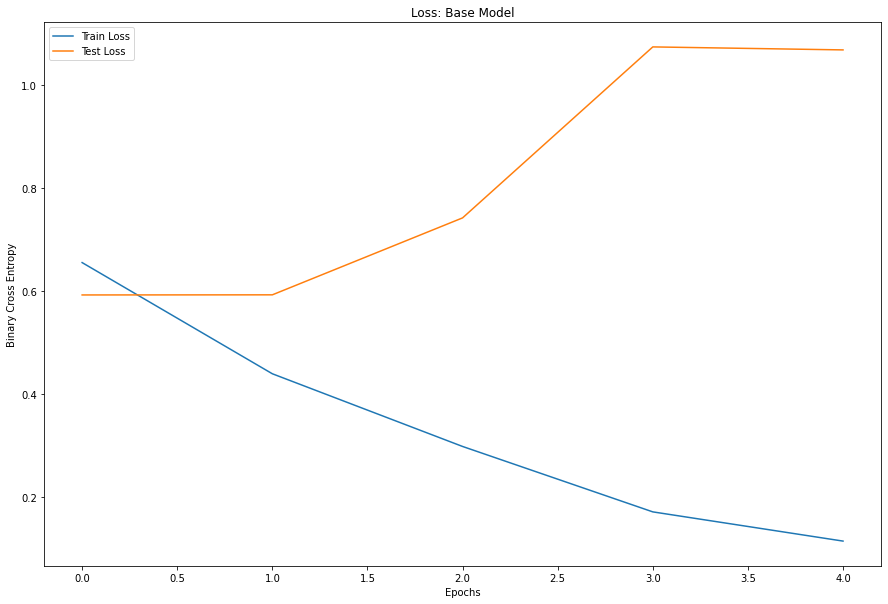

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy')
plt.legend()
plt.title('Loss: Base Model');

Accuracy:

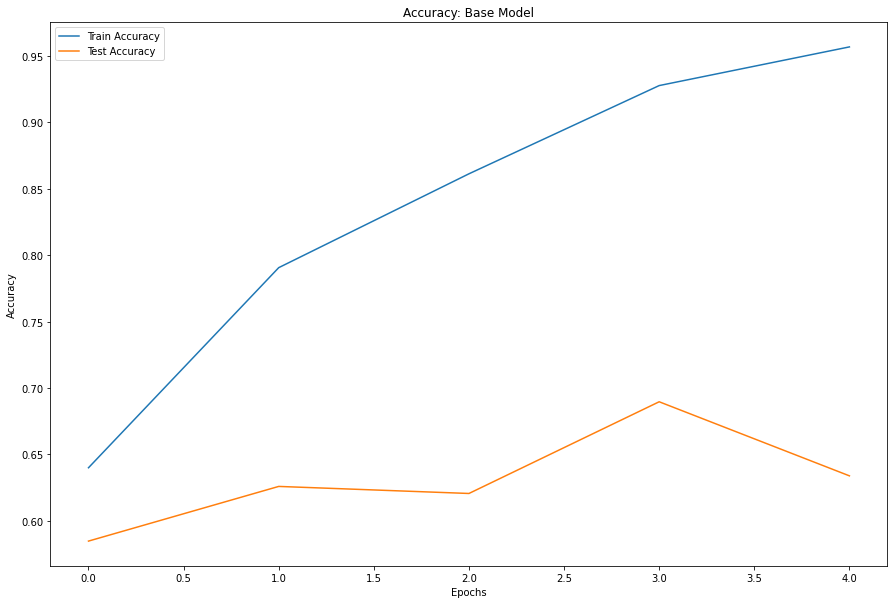

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy: Base Model');

Recall:

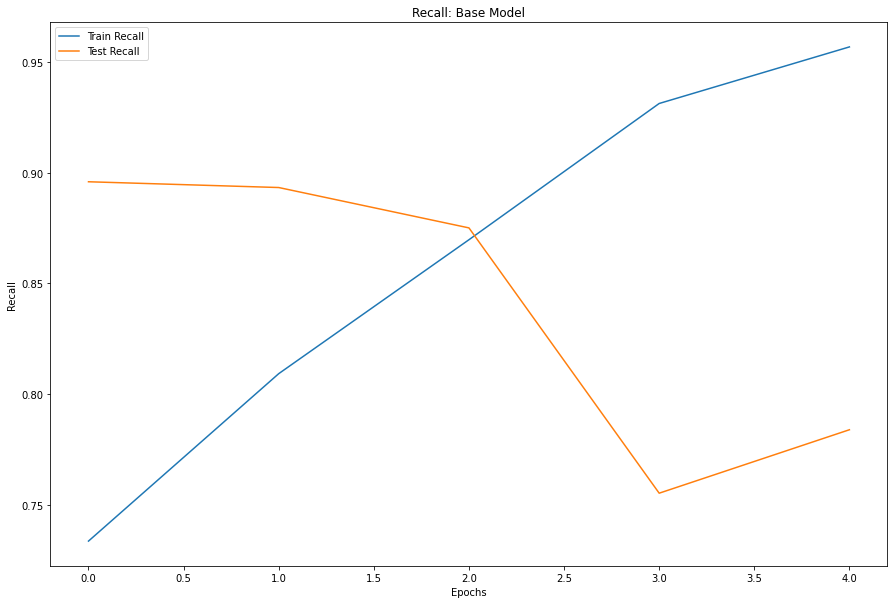

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history.history['recall'], label='Train Recall')
plt.plot(history.history['val_recall'], label='Test Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.title('Recall: Base Model');

Precision:

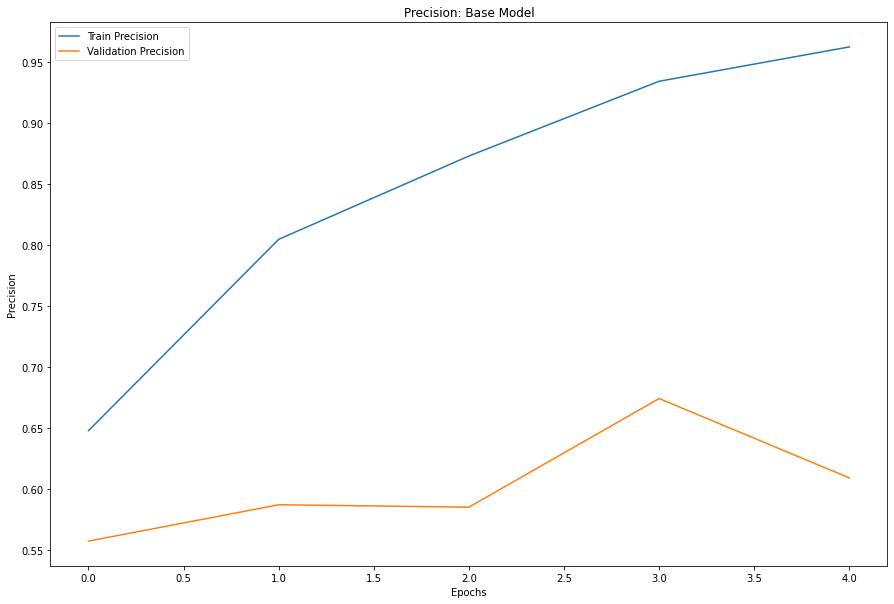

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history.history['precision'], label='Train Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision: Base Model');

Predictions:

In [ ]:
base_preds = BM.predict(test)

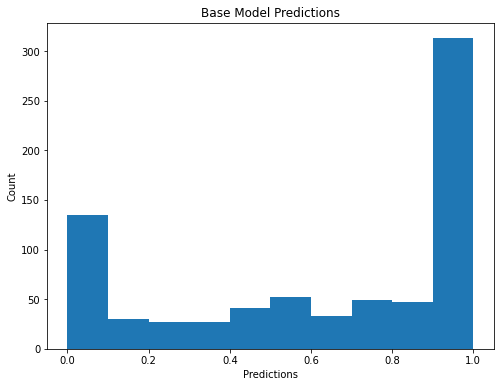

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Base Model Predictions')
plt.xlabel('Predictions')
plt.ylabel('Count')
plt.hist(base_preds);

#### Model 1

In [ ]:
M1.evaluate(test)

24/24 [==============================] - 46s 2s/step - loss: 2.3684 - accuracy: 0.6711 - recall: 0.7682 - precision: 0.6498


[2.368389129638672, 0.6710875034332275, 0.7682291865348816, 0.649779736995697]

In [ ]:
M1.evaluate(val_set)

16/16 [==============================] - 32s 2s/step - loss: 3.0071 - accuracy: 0.5010 - recall: 0.4805 - precision: 0.5104


[3.007106304168701, 0.5009940266609192, 0.48046875, 0.5103734731674194]

Loss:

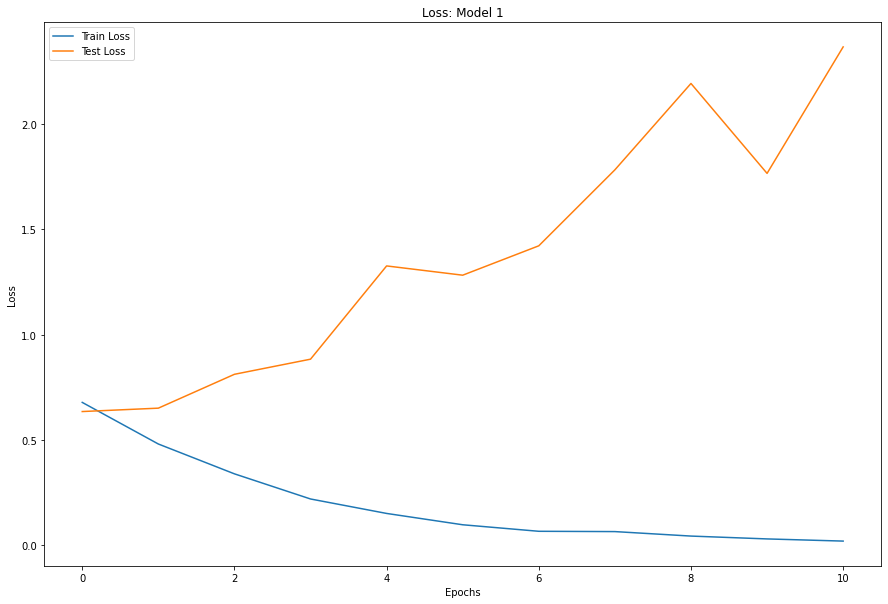

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history_1.history['loss'], label='Train Loss')
plt.plot(history_1.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss: Model 1');

Accuracy:

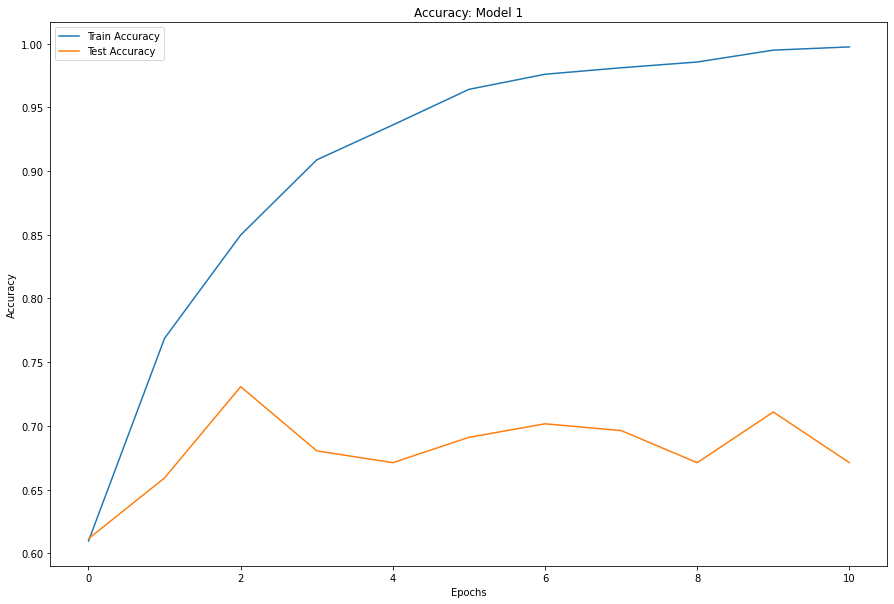

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy: Model 1');

Recall:

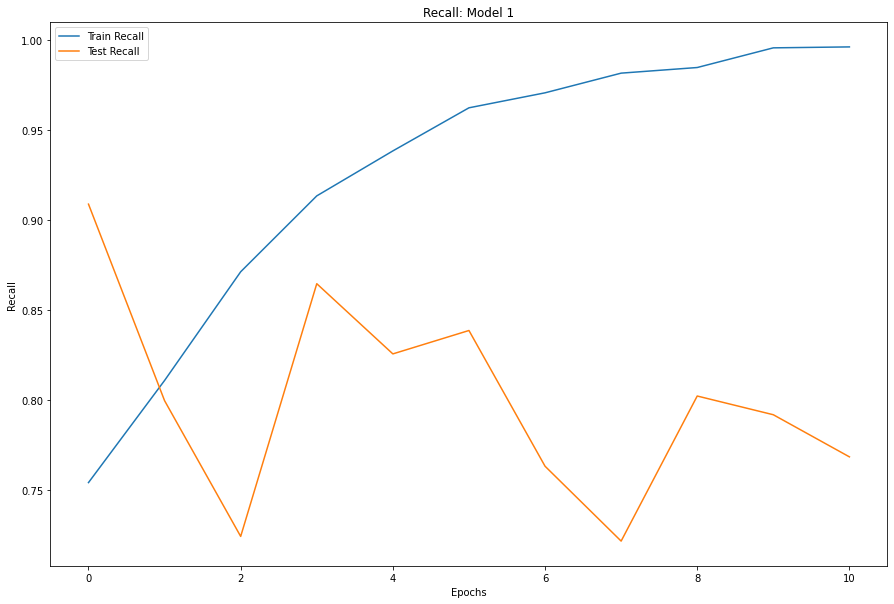

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history_1.history['recall'], label='Train Recall')
plt.plot(history_1.history['val_recall'], label='Test Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.title('Recall: Model 1');

Precision:

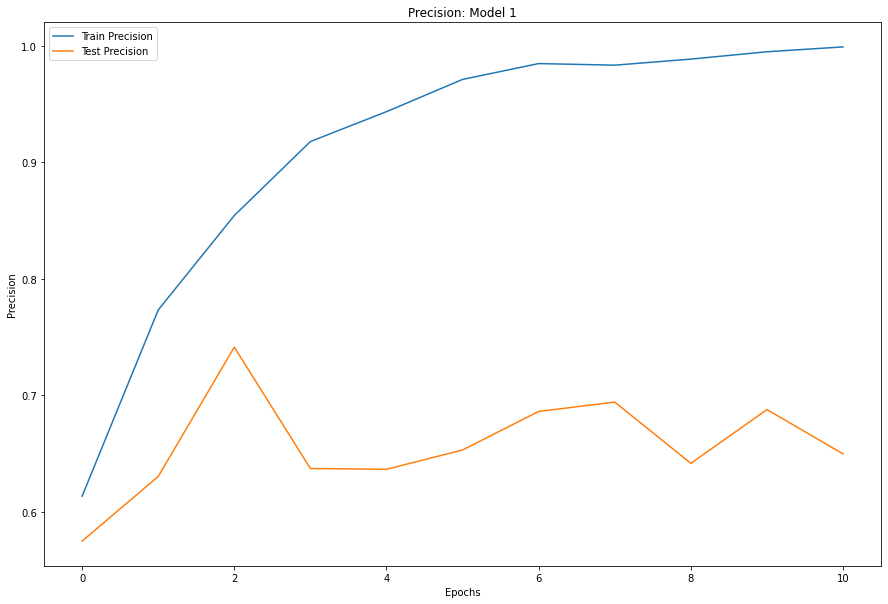

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history_1.history['precision'], label='Train Precision')
plt.plot(history_1.history['val_precision'], label='Test Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision: Model 1');

Predictions:

In [ ]:
model1_preds = M1.predict(test)

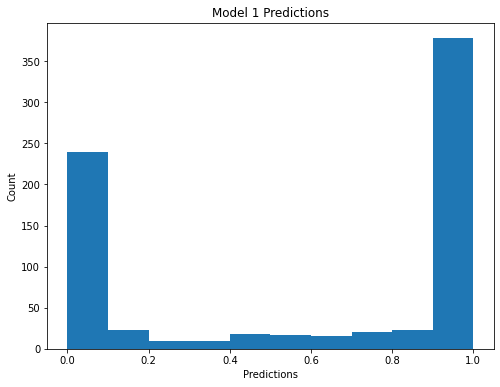

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Model 1 Predictions')
plt.xlabel('Predictions')
plt.ylabel('Count')
plt.hist(model1_preds);

#### Model 2

In [ ]:
M2.evaluate(test)

24/24 [==============================] - 60s 2s/step - loss: 1.8270 - accuracy: 0.6804 - recall: 0.7161 - precision: 0.6757


[1.8270025253295898,
 0.6803713440895081,
 0.7161458134651184,
 0.6756756901741028]

In [ ]:
M2.evaluate(val_set)

16/16 [==============================] - 44s 3s/step - loss: 2.0314 - accuracy: 0.6024 - recall: 0.7656 - precision: 0.5833


[2.031435966491699, 0.6023856997489929, 0.765625, 0.5833333134651184]

Loss:

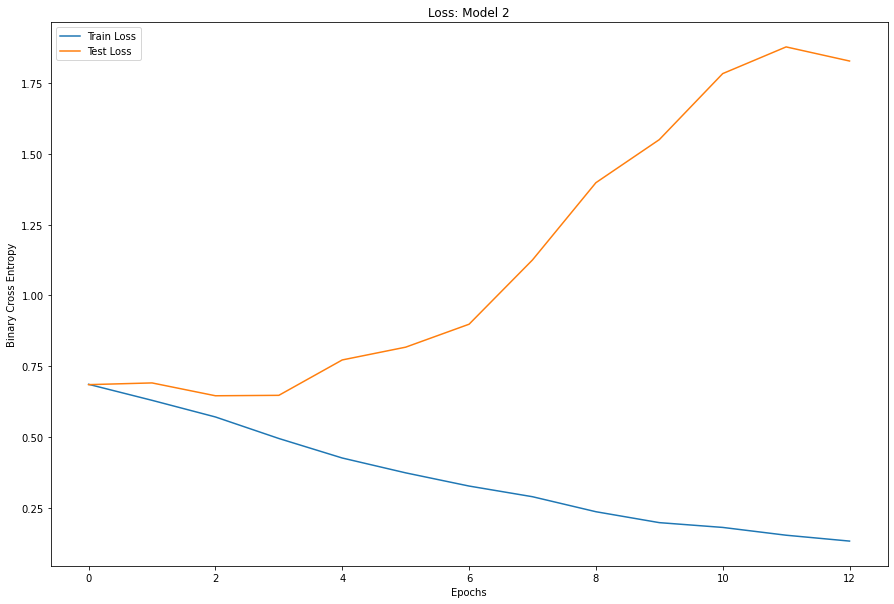

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy')
plt.legend()
plt.title('Loss: Model 2');

Accuracy:

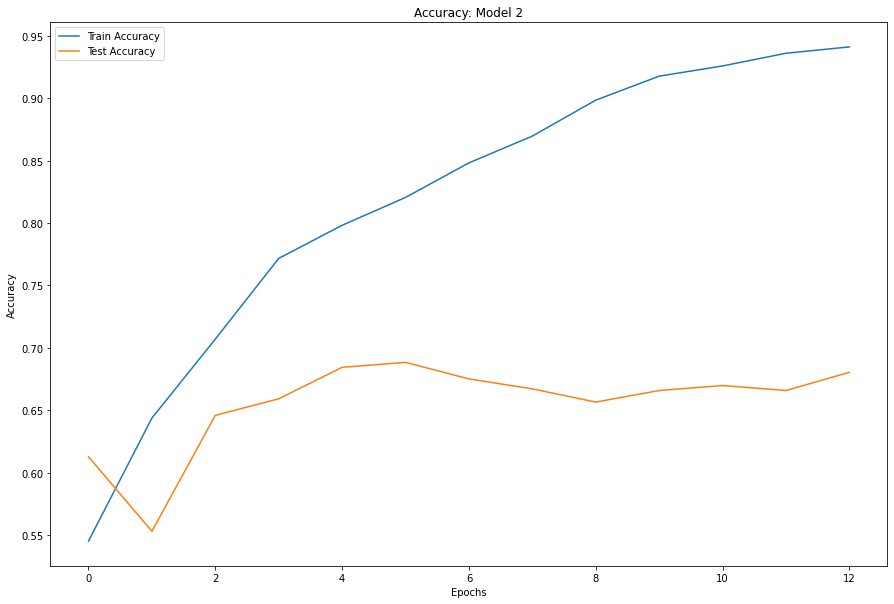

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy: Model 2');

Recall:

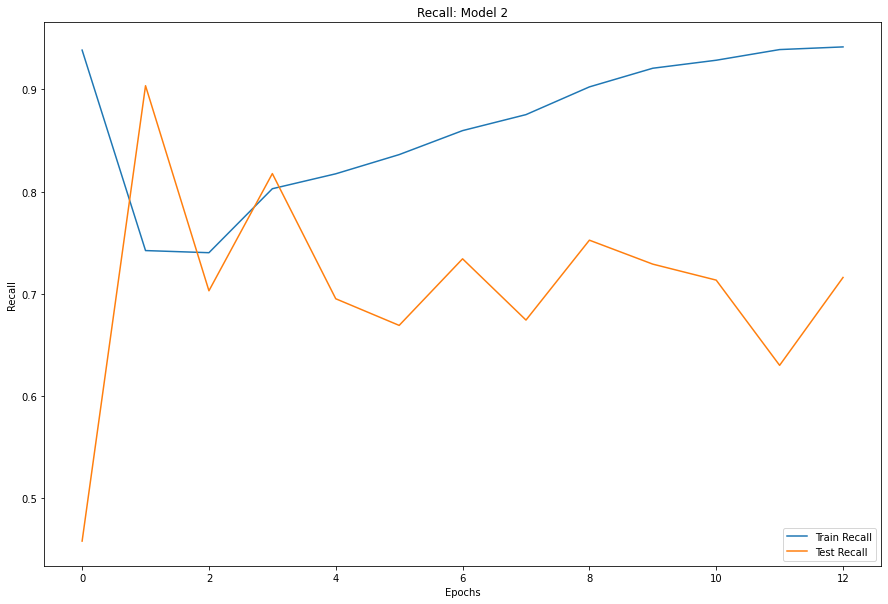

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history_2.history['recall'], label='Train Recall')
plt.plot(history_2.history['val_recall'], label='Test Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.title('Recall: Model 2');

Precision:

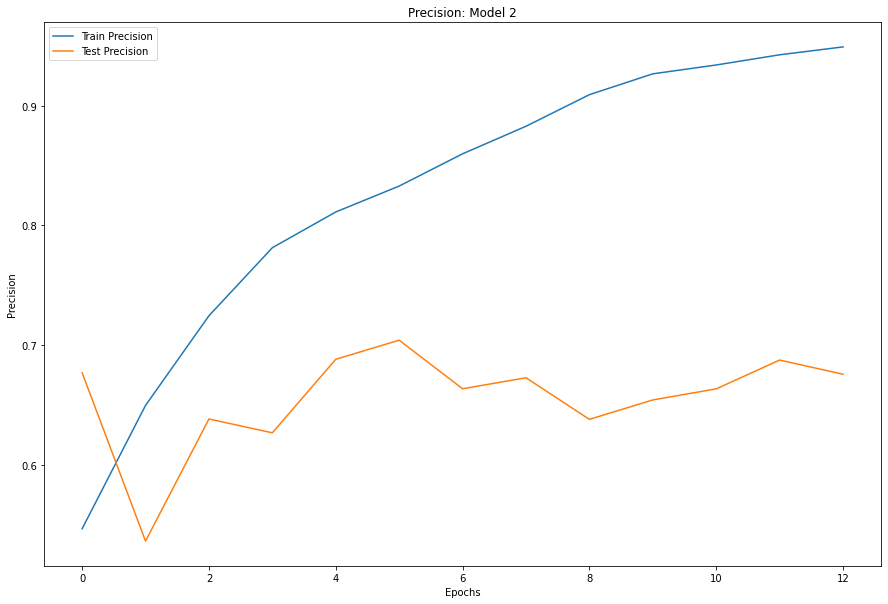

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history_2.history['precision'], label='Train Precision')
plt.plot(history_2.history['val_precision'], label='Test Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision: Model 2');

Predictions:

In [ ]:
model2_preds = M2.predict(test)

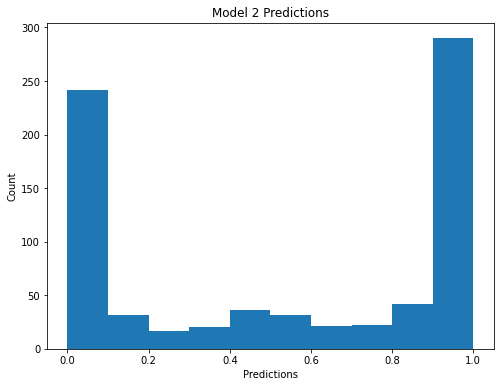

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Model 2 Predictions')
plt.xlabel('Predictions')
plt.ylabel('Count')
plt.hist(model2_preds);

#### Resnet50v2 Model

In [ ]:
ResM.evaluate(test)

24/24 [==============================] - 162s 7s/step - loss: 0.4729 - accuracy: 0.8170 - recall: 0.8438 - precision: 0.8060


[0.4729199707508087, 0.8169761300086975, 0.84375, 0.8059701323509216]

In [ ]:
ResM.evaluate(val_set)

16/16 [==============================] - 109s 7s/step - loss: 0.7747 - accuracy: 0.6839 - recall: 0.6289 - precision: 0.7156


[0.7747018933296204, 0.6838966012001038, 0.62890625, 0.7155555486679077]

Loss:

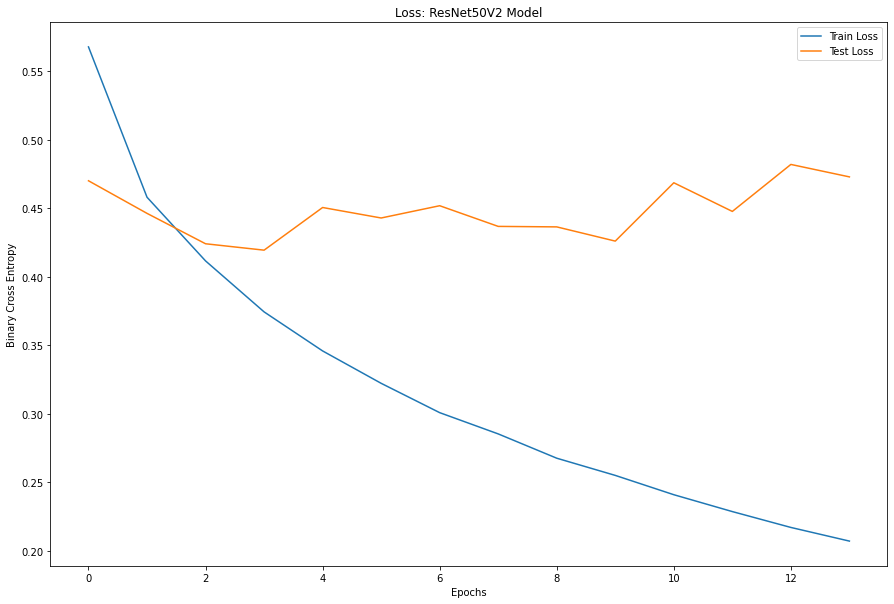

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history_res.history['loss'], label='Train Loss')
plt.plot(history_res.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy')
plt.legend()
plt.title('Loss: ResNet50V2 Model');

Accuracy:

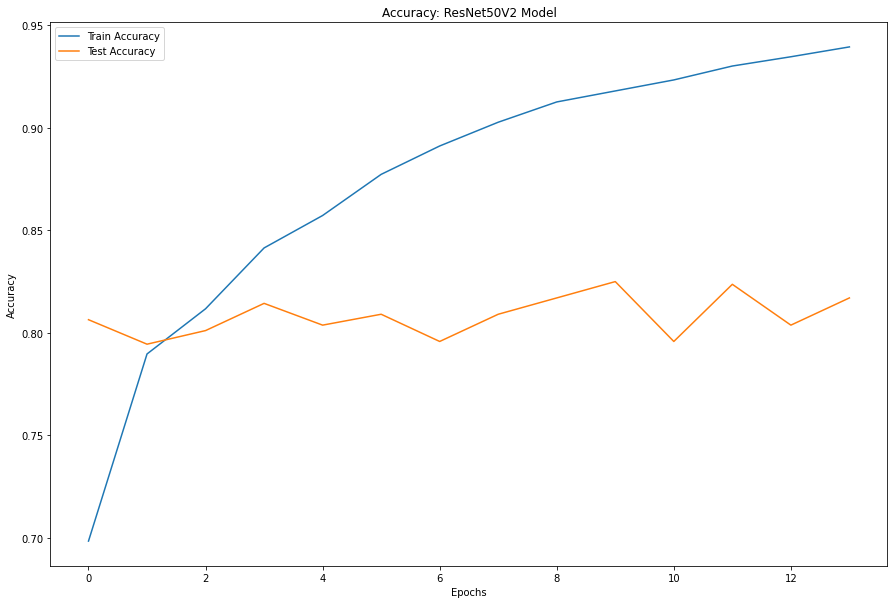

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history_res.history['accuracy'], label='Train Accuracy')
plt.plot(history_res.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy: ResNet50V2 Model');

Recall:

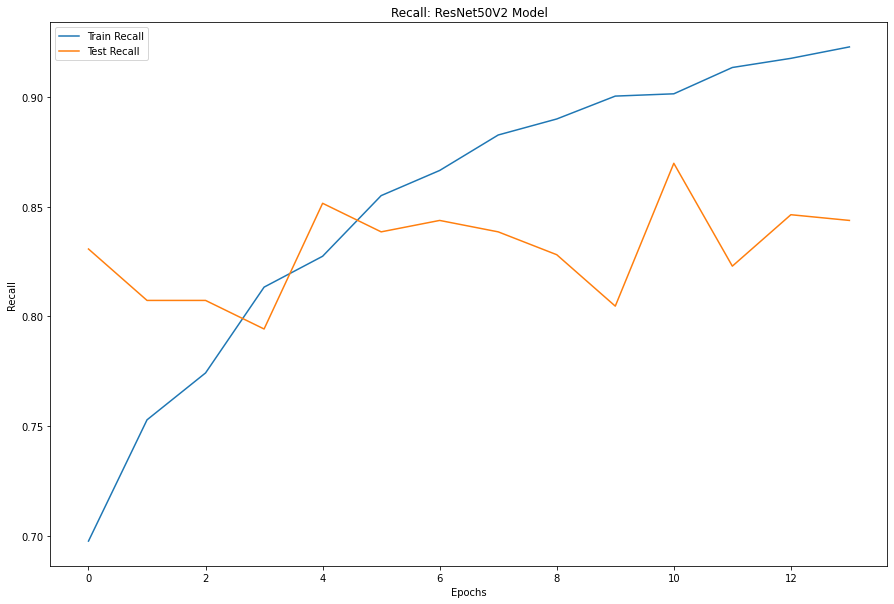

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history_res.history['recall'], label='Train Recall')
plt.plot(history_res.history['val_recall'], label='Test Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.title('Recall: ResNet50V2 Model');

Precision:

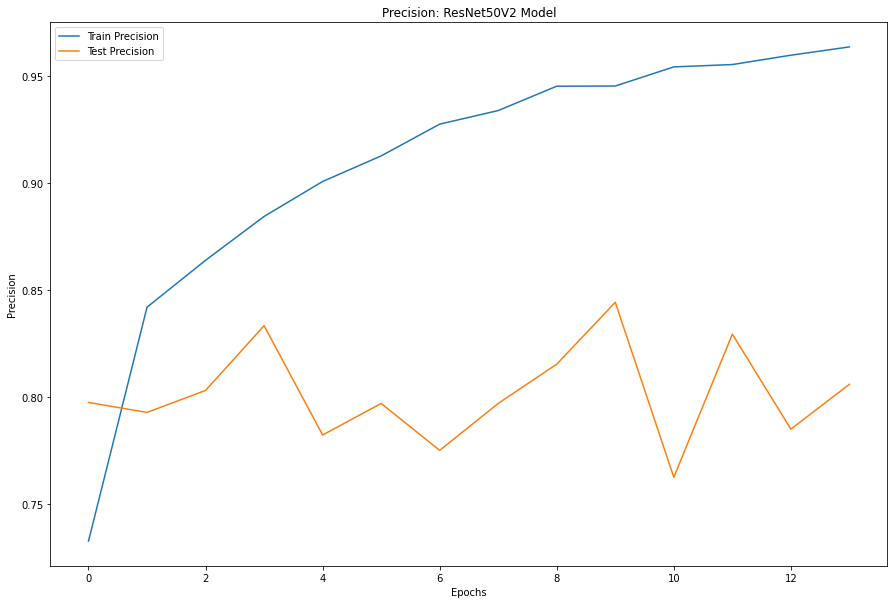

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history_res.history['precision'], label='Train Precision')
plt.plot(history_res.history['val_precision'], label='Test Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision: ResNet50V2 Model');

Predictions:

In [ ]:
resnet_preds = ResM.predict(test)

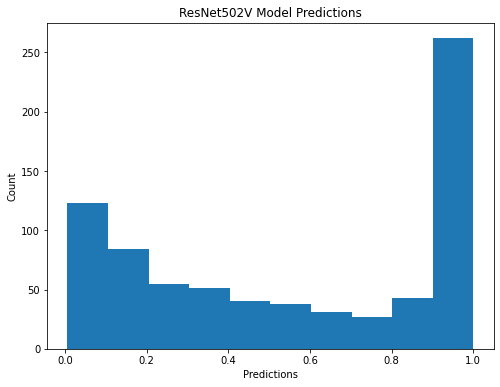

In [ ]:
plt.figure(figsize=(8,6))
plt.title('ResNet502V Model Predictions')
plt.xlabel('Predictions')
plt.ylabel('Count')
plt.hist(resnet_preds);

### Model Comparison

#### Validation Metric Plot Comparisons:

Validation Loss

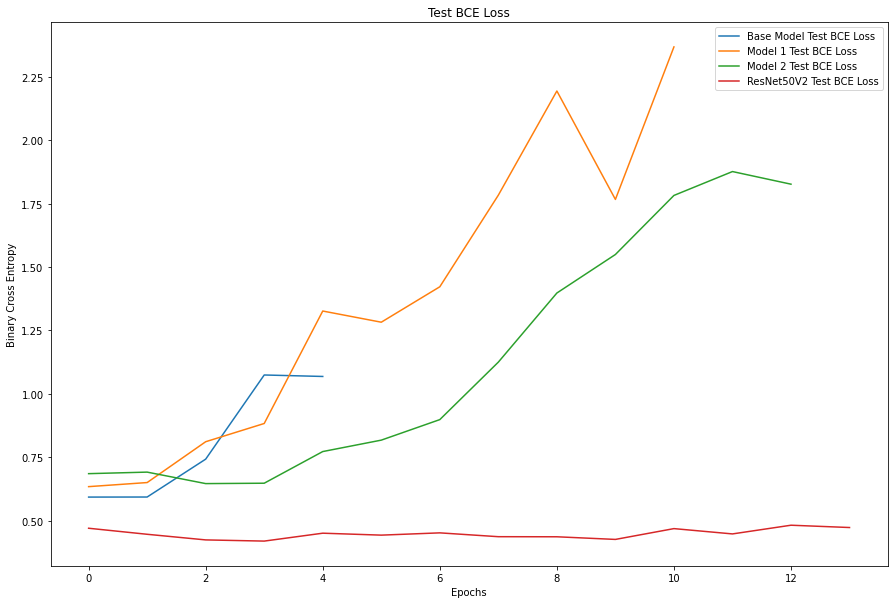

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history.history['val_loss'], label='Base Model Test BCE Loss')
plt.plot(history_1.history['val_loss'], label='Model 1 Test BCE Loss')
plt.plot(history_2.history['val_loss'], label='Model 2 Test BCE Loss')
plt.plot(history_res.history['val_loss'], label='ResNet50V2 Test BCE Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy')
plt.legend()
plt.title('Test BCE Loss');

Validation Accuracy

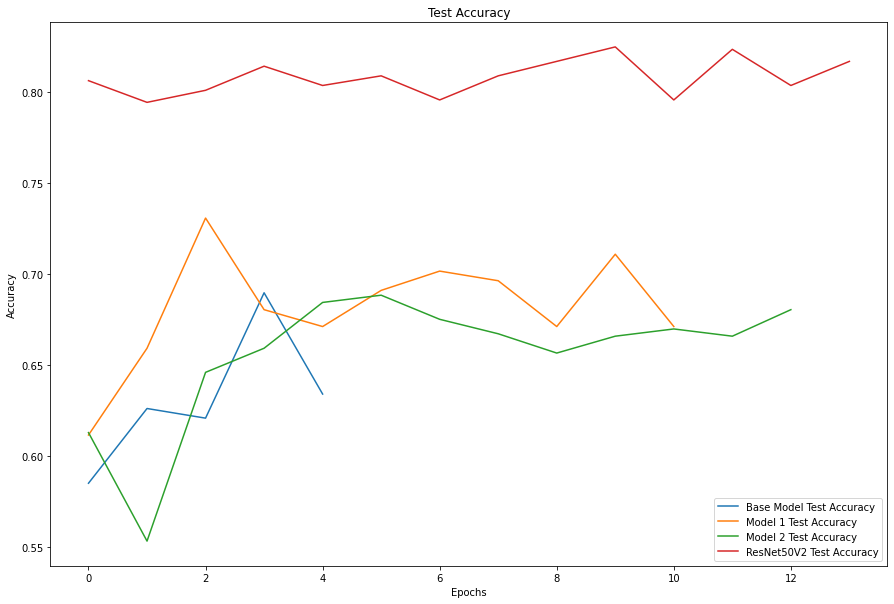

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history.history['val_accuracy'], label='Base Model Test Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Model 1 Test Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Model 2 Test Accuracy')
plt.plot(history_res.history['val_accuracy'], label='ResNet50V2 Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Test Accuracy');

Validation Recall

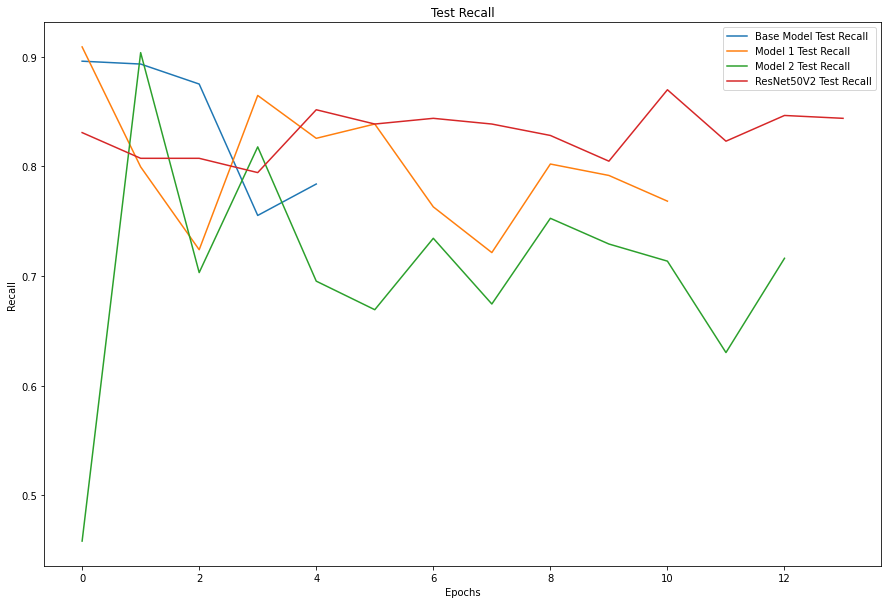

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history.history['val_recall'], label='Base Model Test Recall')
plt.plot(history_1.history['val_recall'], label='Model 1 Test Recall')
plt.plot(history_2.history['val_recall'], label='Model 2 Test Recall')
plt.plot(history_res.history['val_recall'], label='ResNet50V2 Test Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.title('Test Recall');

Validation Precision

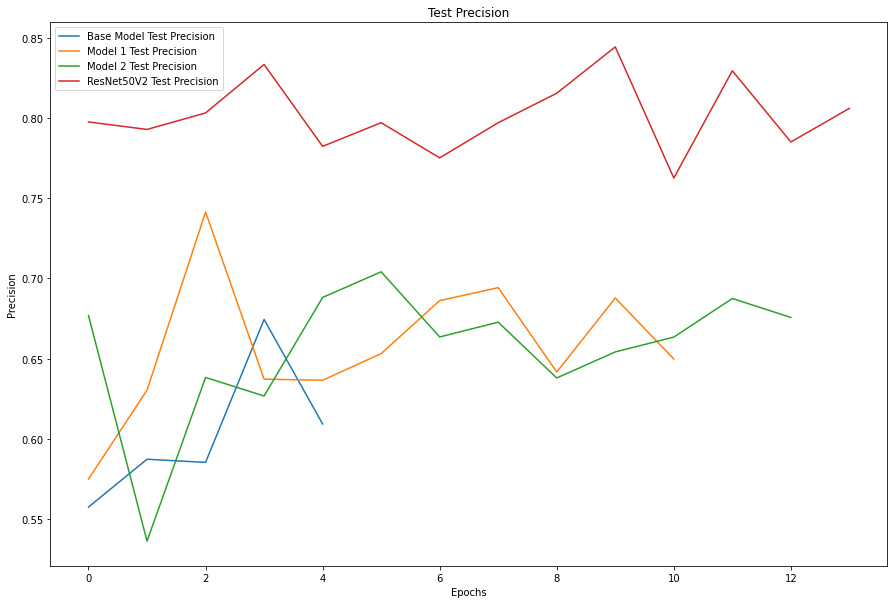

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history.history['val_precision'], label='Base Model Test Precision')
plt.plot(history_1.history['val_precision'], label='Model 1 Test Precision')
plt.plot(history_2.history['val_precision'], label='Model 2 Test Precision')
plt.plot(history_res.history['val_precision'], label='ResNet50V2 Test Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.title('Test Precision');

#### Table Comparison:

`Evaluated Metrics on Test Set`

Comparison Table:

|Model|Evaluated Accuracy|Evaluated Precision|Evaluated Recall|Evaluated Loss (BCE)|
|----|----|----|----|----|
|Base Model|0.6340|0.6093|0.7839|1.0687|
|Model 1|0.6711|0.5104|0.4805|3.0071|
|Model 2 |0.6804|0.6757|0.7161|0.6804|
|ResNet50V2|0.8170|0.8060|0.8438|0.4729|

`Evaluated Metrics on Validation Set`

Comparison Table: 

|Model|Evaluated Accuracy|Evaluated Precision|Evaluated Recall|Evaluated Loss (BCE)|
|----|----|----|----|----|
|Base Model|0.5368|0.5302|0.7891|1.1466|
|Model 1|0.5010|0.5104|0.4805|3.0071|
|Model 2 |0.6024|0.5833|0.7656|2.0314|
|ResNet50V2|0.6839|0.7156|0.6289|0.7747|

### Best Model

The best model of the four is definitely the ResNet50V2 model, because it scored highest in accuracy, precision, recall and loss on the test set, and in accuracy, precision, and loss on unseen data. 

Its scores on the validation set are still very low, and it was not able to beat the baseline model on recall, so there is a lot of room for improvement with this model.

### Conclusions

The models showed a lot of underfitting and in some models there were signs showing a lack of sufficient data to properly train the model. 

The pretrained ResNet502V model did significantly better than the other three when evaluated on the test set, but its scores dropped when evaluated on unseen data. 

The ResNet502V model was the better model amoung the four.


### Code Credit:

7.05 Lesson CNNs 
  - Processing Images
  - CNN

7.06 Transfer Learning

https://keras.io/examples/vision/image_classification_from_scratch/

https://www.tensorflow.org/tutorials/images/classification


https://keras.io/api/applications/

https://keras.io/api/applications/resnet/#resnet50v2-function

https://keras.io/guides/transfer_learning/

https://keras.io/api/models/

https://www.tensorflow.org/guide/keras/save_and_serialize

https://stackoverflow.com/questions/49969006/save-and-load-keras-callbacks-history

https://stackoverflow.com/questions/47843265/how-can-i-get-a-keras-models-history-after-loading-it-from-a-file-in-python

https://keras.io/api/callbacks/

https://keras.io/api/callbacks/model_checkpoint/

https://keras.io/api/callbacks/csv_logger/


https://www.tensorflow.org/guide/keras/transfer_learning
